We would try to tune different hyperparameter at a time while buliding decision tree and observe performance of model.

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import roc_curve,auc,accuracy_score

In [197]:
### Read dataset

data = pd.read_csv('bill_authentication.csv')

In [198]:
data.head(4)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.59440,0


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [200]:
data.shape

(1372, 5)

In [201]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [202]:
x= data[data.columns.difference(['Class'])]
x.head(3)

,Curtosis,Entropy,Skewness,Variance
0,-2.8073,-0.44699,8.6661,3.6216
1,-2.4586,-1.46210,8.1674,4.5459
2,1.9242,0.10645,-2.6383,3.8660


In [203]:
y = data['Class']
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [204]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [205]:
def create_df_list(start,end):
    df = pd.DataFrame(columns = ['Model','hyperparameter name','train accuracy','test accuracy', 'AUC Score'])

    Model_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    AUC_Score_list = []

    param_list = list(np.arange(start,end))
    print("Length of list : ",len(param_list))
    train_auc_score = []
    test_auc_score = []
    return df,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,param_list,train_auc_score,test_auc_score

In [206]:
def parameter_tuning(tree,x_train,y_train,x_test,y_test,Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list,hparam,hparam_val):
    model_name = str(hparam)+'='+str(hparam_val)
    Model_list.append(model_name)
    
    y_train_pred = tree.predict(x_train)
    train_accuracy = accuracy_score(y_train,y_train_pred)
    train_accuracy_list.append(train_accuracy)

    y_test_pred = tree.predict(x_test)
    test_accuracy = accuracy_score(y_test,y_test_pred)
    test_accuracy_list.append(test_accuracy)
    
    fpr,tpr,threshold = roc_curve(y_train,y_train_pred)
    auc_score = auc(fpr,tpr)
    train_auc_score.append(auc_score)

    fpr,tpr,threshold = roc_curve(y_test,y_test_pred)
    auc_score = auc(fpr,tpr)
    test_auc_score.append(auc_score)
    AUC_Score_list.append(auc_score)

    return Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list

In [207]:
def create_roc_plot(x,train_score,test_score,hparam):
    plt.plot(x,train_score,label='Train AUC Score',color='b')
    plt.plot(x,test_score,label='Test AUC Score',color='r')
    plt.xlabel(str(hparam))
    plt.ylabel('Auc Score')
    plt.title('Auc score vs '+str(hparam),fontsize=14,fontweight='bold')
    plt.show()

In [208]:
def tree_plotting(tree):
    fig = plt.figure(figsize=(22,14))
    _ = plot_tree(tree,filled=True)

In [209]:
def store_model_result(df,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,hparam,param_list):
    df['Model']=Model_list
    df['train accuracy']=train_accuracy_list
    df['test accuracy']=test_accuracy_list
    df['AUC Score']=AUC_Score_list
    df['hyperparameter name']=[hparam]*len(param_list)

    return df

In [210]:
### train - test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

print("Training dataset length : ",len(x_train))
print("Testing dataset length : ",len(x_test))

Training dataset length :  1029
Testing dataset length :  343


### 1. Building Decision Tree without tuning

In [211]:
model_details = pd.DataFrame(columns = ['Model','hyperparameter name','train accuracy','test accuracy', 'AUC Score'])
model_details

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score


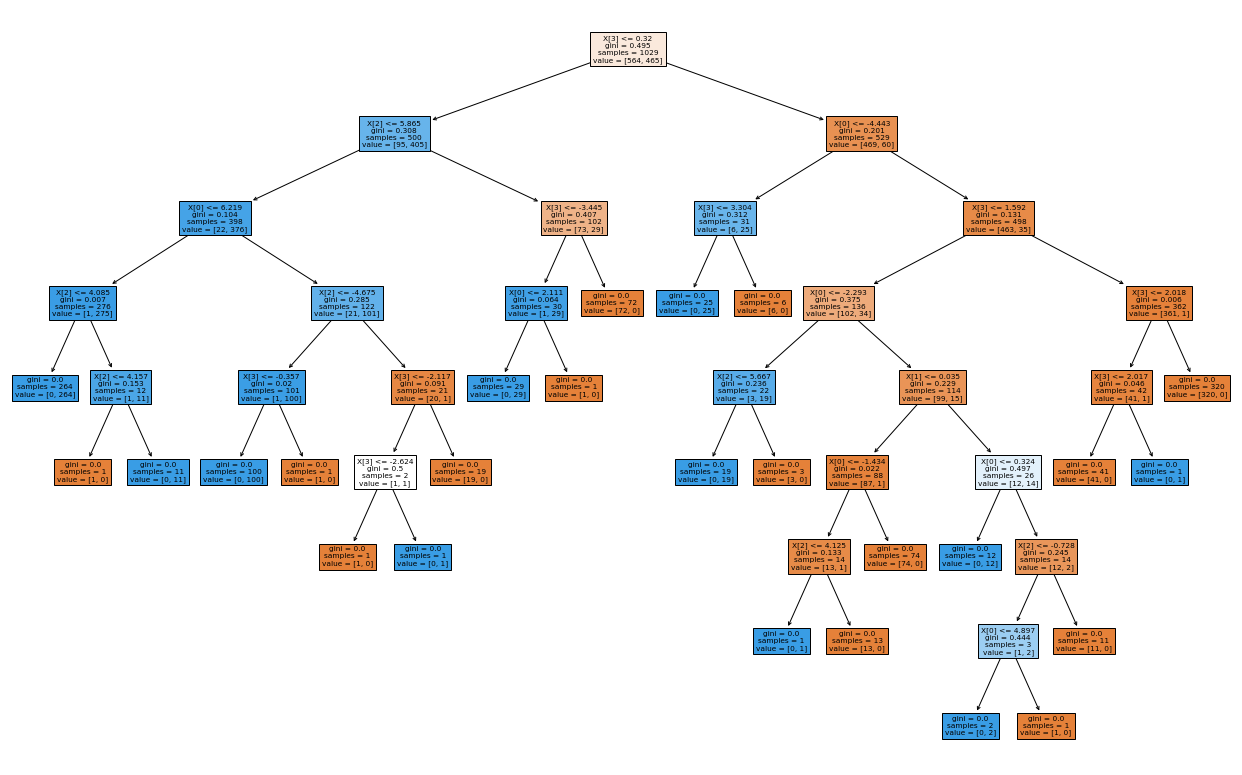

In [212]:
tree = DecisionTreeClassifier(random_state=100).fit(x_train,y_train)

y_train_pred = tree.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_pred)

y_test_pred = tree.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_pred)

fpr,tpr,threshold = roc_curve(y_train,y_train_pred)
auc_score = auc(fpr,tpr)

fpr,tpr,threshold = roc_curve(y_test,y_test_pred)
auc_score = auc(fpr,tpr)

model_details['Model']=['Base Model']
model_details['hyperparameter name']=None
model_details['train accuracy']=train_accuracy
model_details['test accuracy']=test_accuracy
model_details['AUC Score']=auc_score

tree_plotting(tree)

In [213]:
model_details

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score
0,Base Model,None,1.0,0.991254,0.990578


Now we will try tune some hyperparameters and train the tree 

### 2. Build Decision tree and tune 'max_depth' 

In [214]:
model_details1,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,depth_list,train_auc_score,test_auc_score = create_df_list(1,11)

Length of list :  10


In [215]:
model_details1

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score


In [216]:
### using parameter_tuning function

for depth in depth_list:
    tree = DecisionTreeClassifier(random_state=100,max_depth=depth).fit(x_train,y_train)
    Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list = parameter_tuning(tree,x_train,y_train,x_test,y_test,Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list,'max_depth',depth)

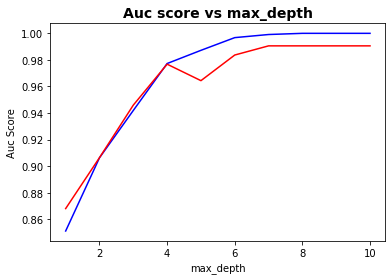

In [217]:
create_roc_plot(depth_list,train_auc_score,test_auc_score,'max_depth')

In [218]:
model_details1 = store_model_result(model_details1,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,'max_depth',depth_list)


In [219]:
model_details1

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score
0,max_depth=1,max_depth,0.849368,0.865889,0.868147
1,max_depth=2,max_depth,0.910593,0.915452,0.906461
2,max_depth=3,max_depth,0.943635,0.950437,0.945994
3,max_depth=4,max_depth,0.978620,0.979592,0.976785
4,max_depth=5,max_depth,0.986395,0.962099,0.964403
5,max_depth=6,max_depth,0.997085,0.985423,0.983682
6,max_depth=7,max_depth,0.999028,0.991254,0.990578
7,max_depth=8,max_depth,1.000000,0.991254,0.990578
8,max_depth=9,max_depth,1.000000,0.991254,0.990578
9,max_depth=10,max_depth,1.000000,0.991254,0.990578


### 3. Build Decision tree and tune 'min_samples_split' 

In [220]:
model_details2,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,min_samples_list,train_auc_score,test_auc_score = create_df_list(2,41)

Length of list :  39


In [221]:
for split in min_samples_list:
    tree = DecisionTreeClassifier(random_state=100,min_samples_split=split).fit(x_train,y_train)
    Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list = parameter_tuning(tree,x_train,y_train,x_test,y_test,Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list,'min_samples_split',split)

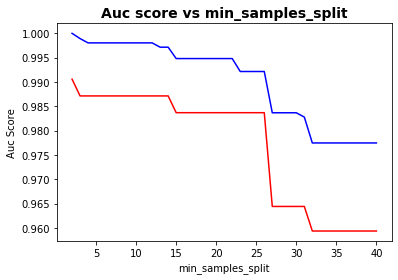

In [222]:
create_roc_plot(min_samples_list,train_auc_score,test_auc_score,'min_samples_split')

In [223]:
model_details2 = store_model_result(model_details2,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,'min_samples_split',min_samples_list)

model_details2

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score
0,min_samples_split=2,min_samples_split,1.000000,0.991254,0.990578
1,min_samples_split=3,min_samples_split,0.999028,0.988338,0.987130
2,min_samples_split=4,min_samples_split,0.998056,0.988338,0.987130
3,min_samples_split=5,min_samples_split,0.998056,0.988338,0.987130
4,min_samples_split=6,min_samples_split,0.998056,0.988338,0.987130
5,min_samples_split=7,min_samples_split,0.998056,0.988338,0.987130
6,min_samples_split=8,min_samples_split,0.998056,0.988338,0.987130
7,min_samples_split=9,min_samples_split,0.998056,0.988338,0.987130
8,min_samples_split=10,min_samples_split,0.998056,0.988338,0.987130
9,min_samples_split=11,min_samples_split,0.998056,0.988338,0.987130


### 4. Build Decision tree and tune 'min_samples_leaf' 

In [224]:
model_details3,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,min_samples_leaf_list,train_auc_score,test_auc_score = create_df_list(1,21)

Length of list :  20


In [225]:
model_details3

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score


In [226]:
for leaf in min_samples_leaf_list:
    tree = DecisionTreeClassifier(random_state=100,min_samples_leaf=leaf).fit(x_train,y_train)
    Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list = parameter_tuning(tree,x_train,y_train,x_test,y_test,Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list,'min_samples_leaf',leaf)

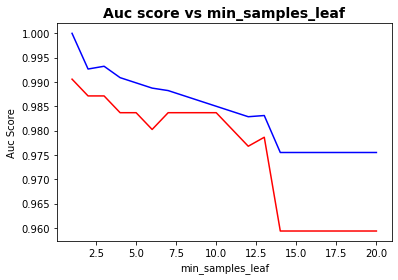

In [227]:
create_roc_plot(min_samples_leaf_list,train_auc_score,test_auc_score,'min_samples_leaf')

In [228]:
model_details3 = store_model_result(model_details3,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,'min_samples_leaf',min_samples_leaf_list)

model_details3

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score
0,min_samples_leaf=1,min_samples_leaf,1.000000,0.991254,0.990578
1,min_samples_leaf=2,min_samples_leaf,0.993197,0.988338,0.987130
2,min_samples_leaf=3,min_samples_leaf,0.993197,0.988338,0.987130
3,min_samples_leaf=4,min_samples_leaf,0.991254,0.985423,0.983682
4,min_samples_leaf=5,min_samples_leaf,0.990282,0.985423,0.983682
5,min_samples_leaf=6,min_samples_leaf,0.989310,0.982507,0.980233
6,min_samples_leaf=7,min_samples_leaf,0.988338,0.985423,0.983682
7,min_samples_leaf=8,min_samples_leaf,0.987366,0.985423,0.983682
8,min_samples_leaf=9,min_samples_leaf,0.986395,0.985423,0.983682
9,min_samples_leaf=10,min_samples_leaf,0.985423,0.985423,0.983682


### 5. Build Decision tree and tune 'max_features' 

In [229]:
start=1
end = x_train.shape[1]+1
model_details4,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,feature_list,train_auc_score,test_auc_score = create_df_list(start,end)

Length of list :  4


In [230]:
model_details4

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score


In [231]:
for feature in feature_list:
    tree = DecisionTreeClassifier(random_state=100,max_features=feature).fit(x_train,y_train)
    Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list = parameter_tuning(tree,x_train,y_train,x_test,y_test,Model_list,train_accuracy_list,test_accuracy_list,train_auc_score,test_auc_score,AUC_Score_list,'max_feature',feature)

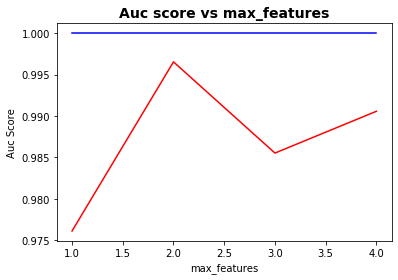

In [232]:
create_roc_plot(feature_list,train_auc_score,test_auc_score,'max_features')

In [233]:
model_details4 = store_model_result(model_details4,Model_list,train_accuracy_list,test_accuracy_list,AUC_Score_list,'max_features',feature_list)

model_details4

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score
0,max_feature=1,max_features,1.0,0.976676,0.976106
1,max_feature=2,max_features,1.0,0.997085,0.996552
2,max_feature=3,max_features,1.0,0.985423,0.985528
3,max_feature=4,max_features,1.0,0.991254,0.990578


In [234]:
print("Combining all models details : ")

Combining all models details : 


In [238]:
final_model_details = pd.concat([model_details,model_details1,model_details2,model_details3,model_details4])

In [239]:
final_model_details

,Model,hyperparameter name,train accuracy,test accuracy,AUC Score
0,Base Model,None,1.000000,0.991254,0.990578
0,max_depth=1,max_depth,0.849368,0.865889,0.868147
1,max_depth=2,max_depth,0.910593,0.915452,0.906461
2,max_depth=3,max_depth,0.943635,0.950437,0.945994
3,max_depth=4,max_depth,0.978620,0.979592,0.976785
...,...,...,...,...,...
19,min_samples_leaf=20,min_samples_leaf,0.973761,0.956268,0.959352
0,max_feature=1,max_features,1.000000,0.976676,0.976106
1,max_feature=2,max_features,1.000000,0.997085,0.996552
2,max_feature=3,max_features,1.000000,0.985423,0.985528


We can analyze above details and check how changing the hyperparameter leads to different accuracy in train and test set and we can also perform Grid serach on combination of hyperparameter to get the optimal set of hyperparameter, so we can fit our final model on those.